In [1]:
import random
import seaborn as sns
import pandas as pd

In [2]:
all_pcs = [6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023, 6024,
                  6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
                  6061, 6062, 6063, 6064, 6065,
                  6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
                  6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162, 6163, 6164, 6166, 6167, 6168,
                  6170, 6171, 6173, 6208, 6210,
                  6211, 6220, 6230, 6232, 6233, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
                  6426, 6430, 6432, 6509, 6528, 6530]

In [3]:
# time_series_25 = []

# for i in range(0,10):
#     sample = random.sample(all_pcs, 75)
#     time_series_25.append(sample)

## Plots and Result Tables

In [4]:
# bottom up aggregation results
hf_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors.csv', index_col=0)

In [5]:
hf_df.head()

,run,sample,category,method,error
0,0,0,0,naive,0.322681
1,0,0,0,arima,0.321692
2,0,0,0,conventional_lstm,0.231297
3,1,0,0,conventional_lstm,0.246363
4,2,0,0,conventional_lstm,0.233219


In [6]:
# this will take the mean across runs

temp_df = hf_df.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

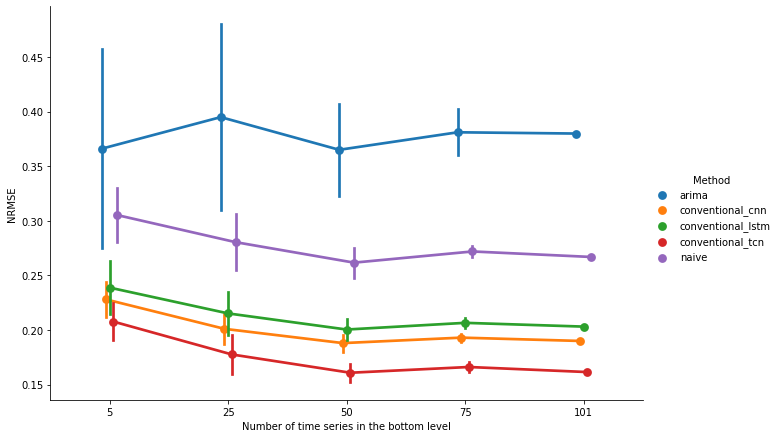

In [7]:
plt_benchmark = sns.catplot(data=temp_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_benchmark.set_xticklabels(['5', '25', '50', '75', '101'])
plt_benchmark.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_benchmark._legend.set_title('Method')

In [8]:
def get_df_method(approach_df, method_name):
    runs = approach_df.values
    df = []

    for run in range(0,len(runs)):
        df.append([run, 0, 4, method_name, runs[run][0]])
        
    return pd.DataFrame(df, columns=['run', 'sample', 'category', 'method', 'error'])


# methodA 101 results
approachA = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_more_layer_without_norm/errors/final_errors.csv', index_col=0)

#methodB 101 results
approachB = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv', index_col=0)

df_A = get_df_method(approachA, 'method-A')
df_B = get_df_method(approachB, 'method-B')

# append these to bottom up table
new_hf_df = hf_df.append(df_A, ignore_index=True)
new_hf_df = new_hf_df.append(df_B, ignore_index=True)

In [9]:
# approachA

In [10]:
# method A category results
methodA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodA.csv', index_col=0)

# method B category results
methodB_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodB.csv', index_col=0)

methodAA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodAA.csv', index_col=0)

In [11]:
# append them together
new_hf_df = new_hf_df.append(methodA_df, ignore_index=True)
new_hf_df = new_hf_df.append(methodB_df, ignore_index=True)
new_hf_df = new_hf_df.append(methodAA_df, ignore_index=True)

In [12]:
# we will take the mean across runs

temp_df2 = new_hf_df.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

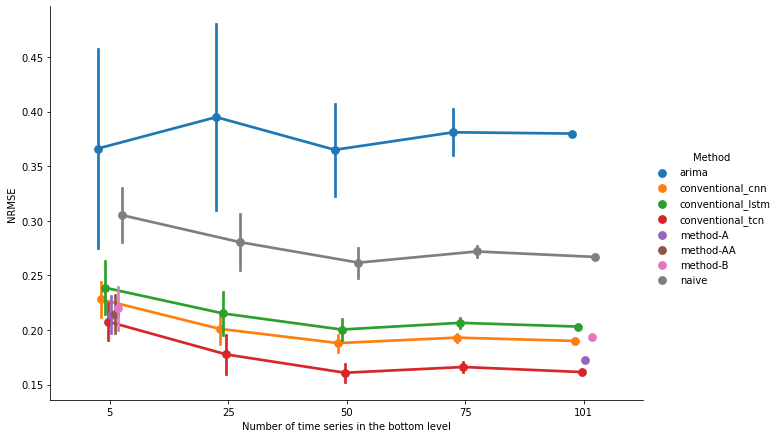

In [13]:
# final plot


plt_all_data = sns.catplot(data=temp_df2, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_all_data.set_xticklabels(['5', '25', '50', '75', '101'])
plt_all_data.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_all_data._legend.set_title('Method')

In [14]:
temp_df2.groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std', 'min']})

error                              
                                mean    median       std       min
category method                                                   
0        arima              0.366216  0.334063  0.096033  0.289876
         conventional_cnn   0.228080  0.227199  0.016830  0.198836
         conventional_lstm  0.238886  0.241758  0.025315  0.177556
         conventional_tcn   0.207779  0.206735  0.017958  0.174330
         method-A           0.214200  0.217654  0.017650  0.185907
         method-AA          0.214951  0.214141  0.018507  0.185465
         method-B           0.219859  0.213883  0.020450  0.197217
         naive              0.305328  0.313380  0.025897  0.262865
1        arima              0.395008  0.397021  0.089606  0.270330
         conventional_cnn   0.201140  0.194665  0.014269  0.186706
         conventional_lstm  0.215254  0.211982  0.020917  0.180623
         conventional_tcn   0.177676  0.173848  0.018376  0.153052
         naive              0.280520  0.277697  0.026919  0.238619
2        arima              0.365072  0.377560  0.044587  0.302702
         conventional_cnn   0.188082  0.188367  0.008236  0.177238
         conventional_lstm  0.200503  0.198374  0.010449  0.187408
         conventional_tcn   0.160939  0.159869  0.008859  0.150856
         naive              0.261755  0.261812  0.014403  0.244571
3        arima              0.381111  0.384657  0.022066  0.352625
         conventional_cnn   0.193086  0.192924  0.003910  0.187439
         conventional_lstm  0.206627  0.206879  0.004897  0.199294
         conventional_tcn   0.166191  0.166096  0.004597  0.158683
         naive              0.271991  0.272757  0.005584  0.262577
4        arima              0.379956  0.379956       NaN  0.379956
         conventional_cnn   0.190054  0.190054       NaN  0.190054
         conventional_lstm  0.203182  0.203182       NaN  0.203182
         conventional_tcn   0.161564  0.161564       NaN  0.161564
         method-A           0.172150  0.172150       NaN  0.172150
         method-B           0.193992  0.193992       NaN  0.193992
         naive              0.266963  0.266963       NaN  0.266963

In [86]:
test_err= new_hf_df.groupby(['sample', 'category', 'method']).agg({'error': ['mean', 'min', 'std']}).reset_index()

In [87]:
test_err.loc[test_err['category']==4]

sample category             method     error                    
                                           mean       min       std
22      0        4              arima  0.379956  0.379956       NaN
23      0        4   conventional_cnn  0.190054  0.185353  0.004253
24      0        4  conventional_lstm  0.203182  0.183753  0.010369
25      0        4   conventional_tcn  0.161564  0.155611  0.004206
26      0        4           method-A  0.172150  0.159659  0.009501
27      0        4           method-B  0.193992  0.172024  0.017367
28      0        4              naive  0.266963  0.266963       NaN